In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np

df = pd.read_csv('rentprediction_dataset_v5.csv')

#df['sqmtr'] = df['sqmtr'].apply(lambda x: np.log(x))

y = df['rent']
X = df.drop(columns={'rent'})



In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
# Initialize and fit the RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Selected Features R-squared value: {r2}')
print(f'Selected Features Mean Squared Error: {mse}')

Selected Features R-squared value: 0.7865707761460924
Selected Features Mean Squared Error: 328318.5678367232


In [ ]:

rfr.fit(X_train, y_train)

# Get feature importances
importances = rfr.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

In [35]:
# Select features with importance greater than a threshold (e.g., mean importance)
threshold = feature_importances['importance'].mean()
selected_features = feature_importances[feature_importances['importance'] > threshold]['feature']
print(f'Selected features: {list(selected_features)}')

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Split the data again with selected features
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=26)

# Initialize and fit the RandomForestRegressor with selected features
rfr_sel = RandomForestRegressor(n_estimators=100,random_state=42, max_depth=5, min_samples_leaf=3)
rfr_sel.fit(X_train_sel, y_train_sel)

# Make predictions on the test set
y_pred_sel = rfr_sel.predict(X_test_sel)

# Calculate the R-squared value and Mean Squared Error
r2_sel = r2_score(y_test_sel, y_pred_sel)
mse_sel = mean_squared_error(y_test_sel, y_pred_sel)
print(f'Selected Features R-squared value: {r2_sel}')
print(f'Selected Features Mean Squared Error: {mse_sel}')



Selected features: ['sqmtr', 'bathrooms', 'eucl_dist_to_Elandsgracht', 'eucl_dist_to_Drenthepark', 'age', 'eucl_dist_to_Rijksmuseum', 'eucl_dist_to_Station RAI Amsterdam', 'eucl_dist_to_Cornelis Troostplein / Van Hillegaertstraat', 'eucl_dist_to_Europaplein', 'eucl_dist_to_Bloemgracht', 'eucl_dist_to_Roelof Hartplein', 'eucl_dist_to_Cornelis Schuytstraat', 'eucl_dist_to_Van Baerlestraat', 'eucl_dist_to_Station RAI', 'eucl_dist_to_Keizergracht', 'eucl_dist_to_Rozengracht / Marnixstraat', 'elabel', 'eucl_dist_to_nearest_park', 'eucl_dist_to_Westermarkt', 'rooms', 'floor', 'eucl_dist_to_Eerste Constantijn Huygensstraat / Overtoom', 'eucl_dist_to_Marnixplein', 'eucl_dist_to_Leidseplein', 'eucl_dist_to_Gerrit van der Veenstraat', 'eucl_dist_to_Minervaplein', 'eucl_dist_to_nearest_train_station', 'eucl_dist_to_Marie Heinekenplein', 'garden']
Selected Features R-squared value: 0.721654107771198
Selected Features Mean Squared Error: 608213.7962367747


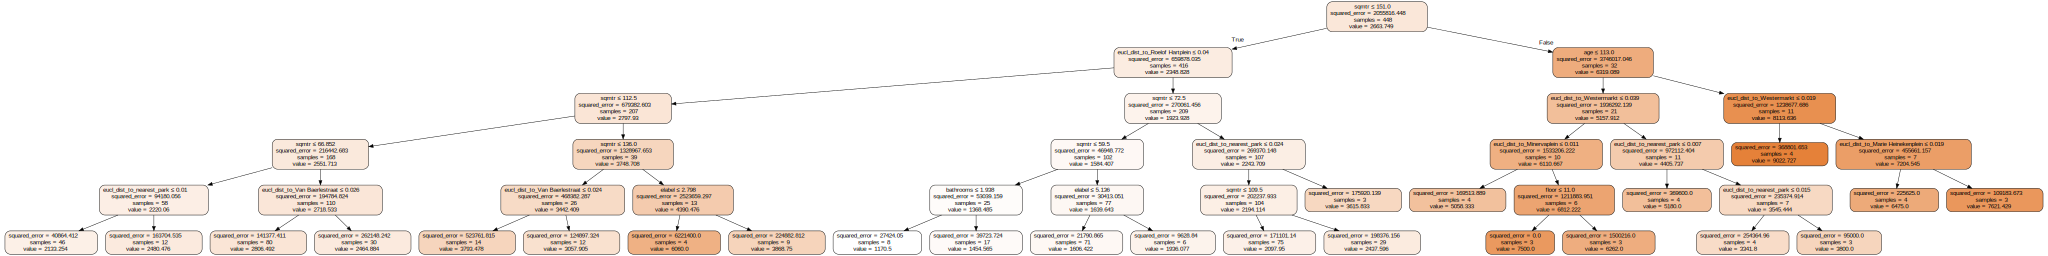

In [32]:
from sklearn.tree import export_graphviz
import graphviz
# Export one of the trees
estimator = rfr_sel.estimators_[0]

# Export as dot file
dot_data = export_graphviz(estimator, out_file=None, 
                           feature_names=X_selected.columns, 
                           filled=True, rounded=True, 
                           special_characters=True)

# Use graphviz to visualize the tree
graph = graphviz.Source(dot_data)  
graph.render("tree")  # This will save the tree as a PDF file called 'tree.pdf'

# Display the tree in Jupyter Notebook (if using)
graph


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rfr.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20))
plt.title('Top 20 Feature Importances')
plt.show()


In [ ]:
from folium.plugins import HeatMap
import folium as folium

# Create a map centered around Amsterdam
m = folium.Map(location=[52.3702, 4.8952], zoom_start=13)

# Prepare data for heat map with rent as the weight
heat_data = [[row['latitude'], row['longitude'], row['rent']] for index, row in df.iterrows()]

# Add heat map to the base map
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file
m.save('heatmap.html')

# Display the map (for Jupyter notebooks)
m

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f'R-squared value: {r2}')

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


R-squared value: -24971.89632877839
Mean Squared Error: 64518177223.74896


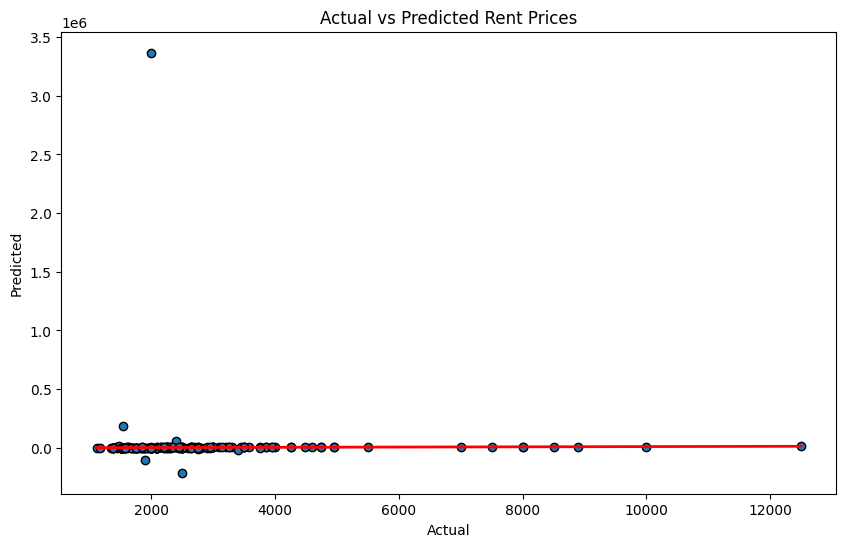

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Rent Prices')
plt.show()


In [8]:
correlation_matrix = df.corr()
print(correlation_matrix)

                                             rent       age     sqmtr  \
rent                                     1.000000  0.271667  0.804677   
age                                      0.271667  1.000000  0.134260   
sqmtr                                    0.804677  0.134260  1.000000   
newbuild                                -0.321496 -0.437453 -0.249998   
rooms                                    0.655780  0.108507  0.773776   
...                                           ...       ...       ...   
eucl_dist_to_Station Weesp              -0.090079 -0.105196 -0.144163   
eucl_dist_to_Station Amsterdam Centraal -0.223766 -0.339646 -0.067096   
eucl_dist_to_nearest_park               -0.080466 -0.119562 -0.057197   
eucl_dist_to_nearest_train_station       0.004082 -0.015021  0.020819   
eucl_dist_to_nearest_tramsubway         -0.042073 -0.073286 -0.027971   

                                         newbuild     rooms    elabel  \
rent                                    -0.321496 